In [1]:
import bs4
import requests
import string

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url = "http://az.lib.ru/r/radishew_a_n/text_0010.shtml" # Путешествие из Петербурга в Москву - А.Н. Радищев 

response = requests.get(url)
soup = bs4.BeautifulSoup(response.text, 'lxml')
text = soup.body.get_text(' ', strip=True)

### Определить 10 самых часто встречающихся слов

In [3]:
# Преобразуем все символы в нижний регистр. Если не сделать, то 'Но' и 'но' будут разными словами. 
text = text.lower()

# Разделим текст на отдельные слова 
words = text.split()

In [4]:
# Символы, которые надо исключить из текста (из слов) 

symbols = "~1234567890\"\'!№;%:?*@#$^&*()_+=[]{}/.,abcdefghijklmnopqrstuvwxyz" 

In [5]:
# Создадим словарь и посчитаем количество каждого встречающегося слова 
word_counts = {} 

for word in words:

    for i in range(len(symbols)): # Исключаем из слов лишние символы, цифры и англ буквы 
        word = word.replace(symbols[i], '') # Методом замены 
    
    # Исключаем все короткие слова длиной в 1 символ (можно сделать >0, если нужно) 
    if (len(word) > 1) & (word != '--'): 
            
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1


In [333]:
#word_counts

In [334]:
# Ещё один способ, рабочий, проверено 

#from collections import Counter # Counter — это подкласс словаря Python, созданный для подсчёта. 
#counts = Counter(words)

#top = counts.most_common(10)
#print(top)

[('и', 1786), ('в', 1715), ('не', 1128), ('--', 853), ('на', 803), ('что', 590), ('я', 524), ('но', 494), ('его', 418), ('с', 366)]


In [6]:
# Создадим из словаря датафрейм 

df = pd.DataFrame(list(word_counts.items()), columns=['Word', 'Frequency'])

df.head()

,Word,Frequency
0,радищев,27
1,александр,6
2,николаевич,4
3,путешествие,6
4,из,204


In [7]:
# Отсортируем по убыванию 

df_sort = df.sort_values(by = 'Frequency', ascending = False)
df_sort.head(10)

,Word,Frequency
31,не,1133
143,на,805
93,что,608
88,но,532
145,его,472
140,он,333
396,то,302
17,от,283
227,если,265
301,или,246


In [8]:
# Берём первые 10 строк 

df_top_10 = df_sort.head(10)

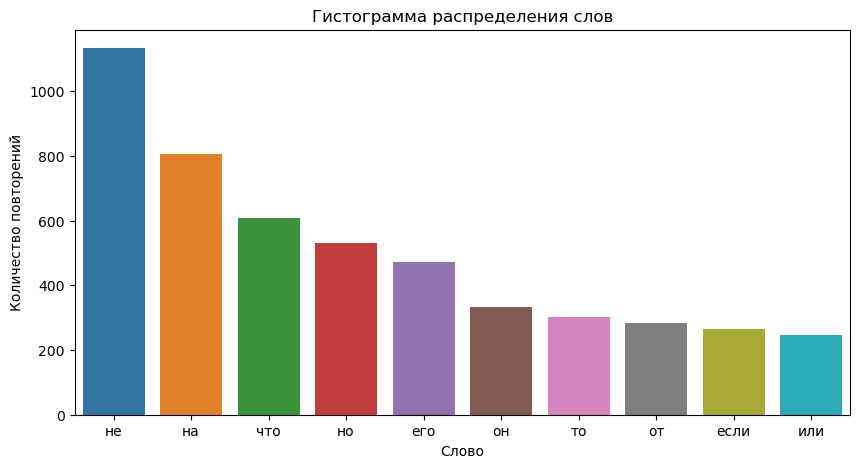

In [9]:
# Строим гистограмму 

plt.figure(figsize=(10, 5)) 
sns.barplot(data = df_top_10, x='Word', y='Frequency')
plt.title('Гистограмма распределения слов')
plt.xlabel('Слово')
plt.ylabel('Количество повторений')
plt.show()

#### Готово